In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import sys
import random
import math
import time
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [14]:
class Vertex:
    def __init__(self, node,lon,lat,cont):
      rand = random.randrange(9000,100000)
      self.id = node
      self.adjacent = {} #forma -> tipo nodo vecino: peso 
      # Distancia infinito para todos los nodos (infinito es un random grande)
      self.distance = rand
      self.distanceG = rand
      self.distanceF = rand
      # Todos los nodos inician como no visitados    
      self.visited = False  
      # prev
      self.previous = None
      #longitud y latitud
      self.longitud = lon
      self.latitud = lat
      self.cont = cont #identificador unico para cada vertice (a parte del id)

    def agregar_vecino(self, neighbor, weight=0):
      self.adjacent[neighbor] = weight

    def obtener_conexiones(self): 
      return self.adjacent.keys() #devuelve los vecinos de tipo vertice (no numerico) 

    def obtener_id(self):
      return self.id

    def obtener_peso(self, neighbor):
      return self.adjacent[neighbor]

    def agregar_distancia(self, dist):
      self.distance = dist

    def obtener_distancia(self):
      return self.distance

    def agregar_distanciaG(self, dist):
      self.distanceG = dist

    def obtener_distanciaG(self):
      return self.distanceG

    def agregar_distanciaF(self, dist):
      self.distanceF = dist

    def obtener_distanciaF(self):
      return self.distanceF

    def obtener_lon(self):
      return self.longitud

    def obtener_lat(self):
      return self.latitud

    def agregar_previous(self, prev):
      self.previous = prev

    def visitado(self):
      self.visited = True

    def __str__(self):
      return str(self.id) + ' adjacent: ' + str([x.id for x in self.adjacent])

class Estruc:
  def __init__(self):
    self.camino = []
    self.reemplazo = []
  def obtener_camino(self):
    return self.camino
  def obtener_reemplazo(self):
    return self.reemplazo

class Graph:
  def __init__(self):
    self.vert_dict = {}
    self.num_vertices = 0

  def __iter__(self):
    return iter(self.vert_dict.values())

  def agregar_vertice(self, node,lon,lat,cont):
    self.num_vertices = self.num_vertices + 1
    new_vertex = Vertex(node,lon,lat,cont)
    self.vert_dict[node] = new_vertex
    return new_vertex

  def obtener_vertice(self, n):
    if n in self.vert_dict:
      return self.vert_dict[n]
    else:
      return None

  def agregar_arista(self, frm, to, cost = 0):
    if frm not in self.vert_dict: #nunca llega a este caso
      self.agregar_vertice(frm)
    if to not in self.vert_dict: #nunca llega a este caso
      self.agregar_vertice(to)

    self.vert_dict[frm].agregar_vecino(self.vert_dict[to], cost)
    #self.vert_dict[to].agregar_vecino(self.vert_dict[frm], cost) ############

  def obtener_vertices(self):
    return self.vert_dict.keys()
  
  def obtener_vertices_nodes(self):
    return self.vert_dict.values()

  def agregar_previous(self, u):
    self.previous = u

  def obtener_previous(self, u):
    return self.previous

  def vnsEstructuras(self): #Solo usar cuando el grafo ya tenga todos los nodos y aristas.
    estruc1 = Estruc()
    estruc2 = Estruc()
    for s in self.vert_dict.values():
      for v in s.obtener_conexiones():
        for v2 in s.obtener_conexiones():
          if v2 != v and v in v2.obtener_conexiones():
            if(s.obtener_peso(v2) + v2.obtener_peso(v) > s.obtener_peso(v)):
              estruc2.camino.append([(s,v2),(v2,v)])
              estruc2.reemplazo.append((s,v))
            else:
              estruc1.camino.append((s,v))
              estruc1.reemplazo.append([(s,v2),(v2,v)])
    return estruc1, estruc2

In [15]:
def vns(individuo, estruc1, estruc2):
    k = 0
    estructuras = [estruc1, estruc2]
    while (k < 2):
        i = 0
        while (i < len(individuo) - k - 1):
            if(k == 0):
                if((individuo[i], individuo[i+1]) in estructuras[k].obtener_camino()):
                    pos = estructuras[k].obtener_camino().index((individuo[i],individuo[i+1]))
                    individuo[i:i+2] = (estructuras[k].obtener_reemplazo()[pos][0][0], estructuras[k].obtener_reemplazo()[pos][0][1], estructuras[k].obtener_reemplazo()[pos][1][1])
                    i = 0
                else: i = i+1
            if(k == 1):
                if([(individuo[i], individuo[i+1]),(individuo[i+1], individuo[i+2])] in estructuras[k].obtener_camino()):
                    pos = estructuras[k].obtener_camino().index([(individuo[i], individuo[i+1]),(individuo[i+1], individuo[i+2])])
                    individuo.pop(i+1)
                    i = 0
                else: i = i+1     
        k = k + 1
    return individuo

In [16]:
#N = Número de individuos
# G = Grafo
#s = nodo inicial
#t = nodo final
def esBucle(nodo):
  banderas = []
  adyacentes = nodo.obtener_conexiones()
  for adyacente in adyacentes:
    if adyacente.visited == True:
      banderas.append(True)
    else: banderas.append(False)
  if(len(banderas) == 1): return banderas[0]
  if(len(banderas) == 0): return True #########
  for i in range(len(banderas) - 1):
    if(i == 0):
      respuesta = banderas[i] and banderas[i+1]
    else:
      respuesta = respuesta and banderas[i+1]
  return respuesta

def poblacionInicial(N, s, t, G):
    poblacion = []
    for i in range(N):
        actual = s
        individuo = []
        individuo.insert(0,s)
        actual.visited = True
        while(actual != t):
            adyacentes = list(actual.obtener_conexiones())
            nodo = random.choice(list(adyacentes))
            if(esBucle(nodo) and nodo != t):
                nodo.visited = True
            if(nodo.visited == False):
                if(actual not in individuo):
                    individuo.append(actual)
                individuo.append(nodo)
                nodo.visited = True
                actual = nodo
            if(esBucle(actual) and actual != t):
                actual.visited = True
                actual = individuo.pop()
        poblacion.append(individuo)
        for vertice in list(G.obtener_vertices_nodes()):
            vertice.visited = False
    return poblacion

def f(x):
    return x
def fitness(individuo):
    suma = 0
    for i in range(len(individuo) - 1):
        suma = suma + individuo[i].obtener_peso(individuo[i+1])
    return suma

def crossover(x1, x2, CROSSOVER_RATIO):
    if(random.random()<= CROSSOVER_RATIO):
        a = x1.copy()
        b = x2.copy()
        inicio = x1[0]
        final = x1[-1]
        cortes = []
        for i in range(len(x1)):
            if x1[i] in x2 and x1[i] is not inicio and x1[i] is not final:
                corte1 = i + 1
                for j in range(len(x2)):
                    if x2[j] == x1[corte1 - 1]:
                        corte2 = j + 1
                        cortes.append((corte1,corte2))
        c = random.choice(cortes)
        aux = x1.copy()
        a[c[0]:] = b[c[1]:]
        b[c[1]:] = a[c[0]:]
        return a,b
    return x1,x2

def mutation(x, estruc1, estruc2, MUTATION_RATIO):
  if(random.random()<= MUTATION_RATIO):
    x = vns(x.copy(), estruc1, estruc2)
    return x
  return x

def operaciones_seleccion_proporcional(cadbin, best, num_padres, estruc1, estruc2, CROSSOVER_RATE,MUTATION_RATE):
  #c = np.ndarray([],dtype=object) #padres
  c = []
  h = [] #hijos
  prob = []
  #Llevando los valores más bajos arriba, y los más altos abajo, ya que lo que quiero es minimizar
  F = []
  for i in range(len(best)):
    F.append(max(best) - best[i] + 1e-6)
  for i in range(len(F)):
    prob.append((F[i]+100)/(sum(F)+(100*len(F))))

  #num_padres siempre es par
  rnd_indices = np.random.choice(len(cadbin.copy()),num_padres,replace=False, p=prob.copy())
  #rnd_indices = np.random.choice(len(cadbin),num_padres,replace=False)
  for z in range(num_padres):
    c.append(cadbin[rnd_indices[z]])
  indice2 = 0
  for i in range(int(num_padres/2)):
    c1 , c2 = crossover(c[indice2].copy(), c[indice2+1].copy(),CROSSOVER_RATE)
    h.append(mutation(c1.copy(), estruc1, estruc2, MUTATION_RATE))
    h.append(mutation(c2.copy(), estruc1, estruc2, MUTATION_RATE))
    #h.append(c1)
    #h.append(c2)
    indice = indice2 - 1
    for k in range(2): #Siempre será 2, pues evaluamos a los dos nuevos hijos
      cadbin.append(h[indice+1])
      indice = indice+1
    indice2 = indice2+2
  return cadbin

def select_elitista(cadbin, POBLACION): #Se seleccionan las POBLACION mejores soluciones para la siguiente generacion
  pesos = []
  pesos_ord = []
  next_generation = []
  for i in range(len(cadbin)):
    pesos.append(fitness(cadbin[i]))
    pesos_ord.append(fitness(cadbin[i]))
  pesos_ord.sort()
  for i in range(len(cadbin)):
    pos = pesos.index(pesos_ord[i])
    next_generation.append(cadbin[pos])
  return next_generation[0:POBLACION]

In [17]:
# cadbin es el conjunto de donde seleccionarás
# n es la cantidad de individuos a seleccionar
def girar_ruleta(cadbin, best):
    b = best.copy()
    f = np.array(best)
    f = (max(best) - f + 1)
    f = f/sum(f)
    f.sort()
    F = []
    suma = 0
    for i in range(len(best)):
        suma = suma + f[i]
        F.append(suma)
    b.sort(reverse=True)        
    r = random.random()
    for i in range(len(best)):
        if(r <= F[i]):
            pos = best.index(b[i])
            return cadbin.copy()[pos]
    
def select_ruleta(cadbin, best, n):
    next_generation = []
    for i in range(n):
        next_generation.append(girar_ruleta(cadbin, best))
    return next_generation

In [18]:
def AG_caminoMinimo(N,GENERACIONES,CROSSOVER_RATE,MUTATION_RATE, num_padres, q, s, t, g, seleccion):
    online, offline, on, off = [], [], [], []
    estruc1, estruc2 = g.vnsEstructuras()
    cadbin = poblacionInicial(N,g.obtener_vertice(s), g.obtener_vertice(t),g)
    POBLACION = N
    mejores_por_generacion = []
    mejor = []
    for j in range(N):
        #cadbin[j] = vns(cadbin[j].copy(), estruc1, estruc2) ## primer uso de vns
        mejor.append(fitness(cadbin[j]))
    mejores_por_generacion.append(min(mejor))
    ##Inicio del algoritmo
    for i in range(GENERACIONES):
        best = []
        mejor = []
        for j  in range(N):
            best.append(fitness(cadbin[j]))
        cadbin = operaciones_seleccion_proporcional(cadbin.copy(), best, num_padres, estruc1, estruc2, CROSSOVER_RATE, MUTATION_RATE)
        N = len(cadbin)
        best = []
        for j in range(N):
            best.append(fitness(cadbin[j]))
        if(seleccion == "ELITISTA"):
            cadbin = select_elitista(cadbin.copy(), POBLACION)
        if(seleccion == "RULETA"):
            cadbin = select_ruleta(cadbin.copy(), best, POBLACION)
        N = len(cadbin)
        for j in range(N):
            mejor.append(fitness(cadbin[j]))
        mejores_por_generacion.append(min(mejor))
        #Calcular online y offline
        on = np.concatenate([on, best]) #best tiene longitud N
        off = np.concatenate([off,[min(best)]])
        if(i >= q):
            offline.append(np.mean(off))
            online.append(np.mean(on))
            on = on[N:]
            off = off[1:]

    respuestas = []
    for i in range(len(cadbin)):
        respuestas.append(fitness(cadbin[i]))
    print("mejor fitness final: ", min(respuestas))
    return online, offline, mejores_por_generacion

In [19]:
# lonline, loffline = [], []

# lhiperparametros = []

# vertices1 = pd.read_csv("../mapas/mapa3/nodes3.csv")
# aristas1 = pd.read_csv("../mapas/mapa3/edges3.csv")

# g = Graph()
# for i in range(vertices1.shape[0]):
#   g.agregar_vertice(vertices1["id"][i], vertices1["lon"][i], vertices1["lat"][i],i)

# for j in range(aristas1.shape[0]):
#   g.agregar_arista(aristas1["source"][j],aristas1["target"][j],aristas1["length"][j])

# GENERACIONES = 50
# q = 5 
# s = 4261133139
# t = 4436916496

# for _ in range(1):
#    hiperparametros = {}

#    #Elige hiperparametros en el rango dado
#    MUTATION_RATE = random.random()*(0.3 - 0.05) + 0.05 #Rango:[0.05 - 0.3]
#    CROSSOVER_RATE = random.random()*(0.8 - 0.5) + 0.5  #Rango:[0.5  - 0.8]
#    N = random.randint(50, 300)
#    num_padres = int((random.random()*0.8 + 0.2)*N) #Rango de 20% a 80% de la poblacion inicial
   

#    #Guarda hiperparametros
#    hiperparametros["MUTATION_RATE"] = MUTATION_RATE
#    hiperparametros["CROSSOVER_RATE"] = CROSSOVER_RATE
#    hiperparametros["N"] = N
#    hiperparametros["NUM_PADRES"] = num_padres
#    lhiperparametros.append(hiperparametros)

#    online, offline, f = AG_caminoMinimo(N=N, GENERACIONES=GENERACIONES, CROSSOVER_RATE=CROSSOVER_RATE, MUTATION_RATE=MUTATION_RATE, num_padres=num_padres, q=q, s=s, t=t, g=g)
#    #Guarda estadísticas
#    lonline.append(online)
#    loffline.append(offline)
#    #lbest.append(f) #mejores por generación
  

mejor fitness final:  1814.4731779267865


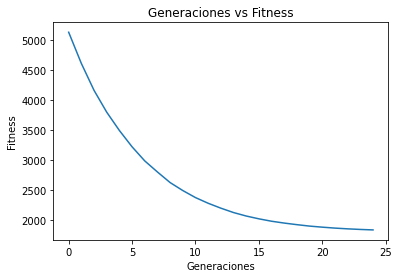

In [20]:
vertices1 = pd.read_csv("../mapas/mapa2/nodes2.csv")
aristas1 = pd.read_csv("../mapas/mapa2/edges2.csv")

g = Graph()
for i in range(vertices1.shape[0]):
  g.agregar_vertice(vertices1["id"][i], vertices1["lon"][i], vertices1["lat"][i],i)

for j in range(aristas1.shape[0]):
  g.agregar_arista(aristas1["source"][j],aristas1["target"][j],aristas1["length"][j])

N = 150
num_padres = 130
s = 9851999130
t = 9291573217

CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.6
GENERACIONES = 30
online, offline, f = AG_caminoMinimo(N, GENERACIONES, CROSSOVER_RATE, MUTATION_RATE, num_padres, 5,  s, t, g, seleccion="RULETA")

plt.title("Generaciones vs Fitness")
plt.plot(online)
plt.ylabel("Fitness")
plt.xlabel("Generaciones")
plt.show()

mejor fitness final:  3544.7217359440338
mejor fitness final:  2528.738170254291
mejor fitness final:  2778.6696198515224
mejor fitness final:  2832.0600177880906
mejor fitness final:  2746.011505084017
mejor fitness final:  3125.2432461157714
mejor fitness final:  3087.158562362608
mejor fitness final:  3490.117446703658
mejor fitness final:  2457.375301711026
mejor fitness final:  2154.449432041466


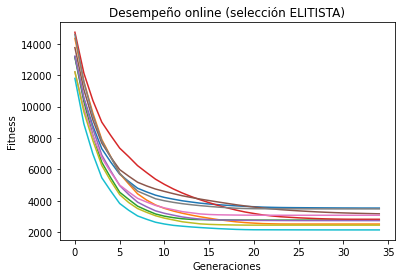

In [21]:
vertices1 = pd.read_csv("../mapas/mapa3/nodes3.csv")
aristas1 = pd.read_csv("../mapas/mapa3/edges3.csv")

g = Graph()
for i in range(vertices1.shape[0]):
  g.agregar_vertice(vertices1["id"][i], vertices1["lon"][i], vertices1["lat"][i],i)

for j in range(aristas1.shape[0]):
  g.agregar_arista(aristas1["source"][j],aristas1["target"][j],aristas1["length"][j])

N = 100
num_padres = 80
s = 4261133139
t = 4436916496

CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.8
GENERACIONES = 40

for i in range(10):
  online, offline, f = AG_caminoMinimo(N, GENERACIONES, CROSSOVER_RATE, MUTATION_RATE, num_padres, 5,  s, t, g, seleccion="ELITISTA")
  plt.plot(online)
plt.title("Desempeño online (selección ELITISTA)")
plt.ylabel("Fitness")
plt.xlabel("Generaciones")
plt.show()

mejor fitness final:  5325.0364045798815
mejor fitness final:  2724.689674551378
mejor fitness final:  5341.830758099097
mejor fitness final:  4807.407210815049
mejor fitness final:  2788.8138934732133
mejor fitness final:  5159.553205312523
mejor fitness final:  2706.3558232200953
mejor fitness final:  2751.419524236216
mejor fitness final:  2456.0939610323744
mejor fitness final:  4444.107988185007


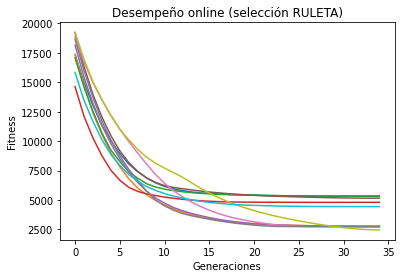

In [22]:
vertices1 = pd.read_csv("../mapas/mapa3/nodes3.csv")
aristas1 = pd.read_csv("../mapas/mapa3/edges3.csv")

g = Graph()
for i in range(vertices1.shape[0]):
  g.agregar_vertice(vertices1["id"][i], vertices1["lon"][i], vertices1["lat"][i],i)

for j in range(aristas1.shape[0]):
  g.agregar_arista(aristas1["source"][j],aristas1["target"][j],aristas1["length"][j])

N = 100
num_padres = 80
s = 4261133139
t = 4436916496

CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.8
GENERACIONES = 40

for i in range(10):
  online, offline, f = AG_caminoMinimo(N, GENERACIONES, CROSSOVER_RATE, MUTATION_RATE, num_padres, 5,  s, t, g, seleccion="RULETA")
  plt.plot(online)
plt.title("Desempeño online (selección RULETA)")
plt.ylabel("Fitness")
plt.xlabel("Generaciones")
plt.show()

Se elige el método de la ruleta porque es el que está teniendo cambios contínuos, aunque no llegue a una solución rápidamente como lo hace el elitista. La gráfica del método elitista señala que se llega a una solución rápidamente, pero atrapándose en óptimos locales.

# Ajuste de parámetros

mejor fitness final:  3312.9476241824404
mejor fitness final:  5706.0970867161295
mejor fitness final:  2291.2227443221386
mejor fitness final:  4368.681846219916
mejor fitness final:  4917.281019766861
mejor fitness final:  5036.1377642466805
mejor fitness final:  2920.3083442243765
mejor fitness final:  5052.120671127578


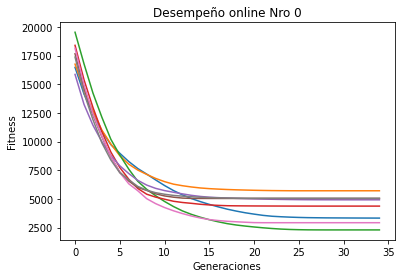

mejor fitness final:  2735.55194131723
mejor fitness final:  3082.7073708499665
mejor fitness final:  2211.445068022817
mejor fitness final:  1814.3817939529185
mejor fitness final:  2123.3259783355165
mejor fitness final:  2232.042803691781
mejor fitness final:  2782.774830818566
mejor fitness final:  2220.9957453873526


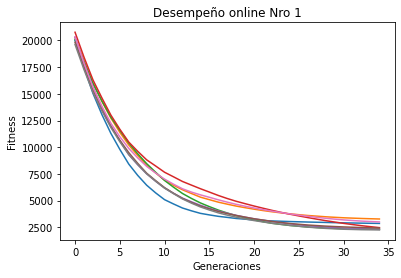

mejor fitness final:  1782.4347013041738
mejor fitness final:  4328.648175963189
mejor fitness final:  2122.135563692175
mejor fitness final:  1783.2845518768759
mejor fitness final:  2063.5157958571917
mejor fitness final:  1820.3151027258082
mejor fitness final:  3179.5025111344053
mejor fitness final:  2947.648343396487


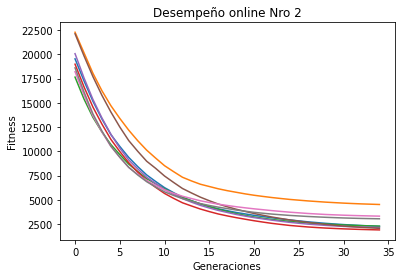

mejor fitness final:  3718.2984719584474
mejor fitness final:  2735.55194131723
mejor fitness final:  3499.691711772201
mejor fitness final:  3639.602005064284
mejor fitness final:  2339.600882840152
mejor fitness final:  2528.4456592277093
mejor fitness final:  4393.9849611482605
mejor fitness final:  3564.3077509276113


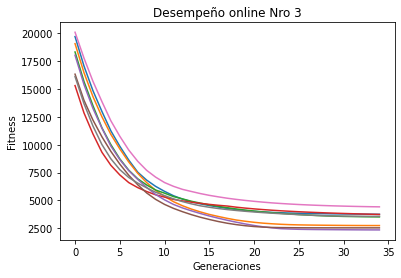

mejor fitness final:  2252.1617095664296
mejor fitness final:  2336.127435286692
mejor fitness final:  3668.783316103025
mejor fitness final:  2285.830251179393
mejor fitness final:  2187.6343812481173
mejor fitness final:  2272.636606440077
mejor fitness final:  1931.756114246766
mejor fitness final:  2189.349351022539


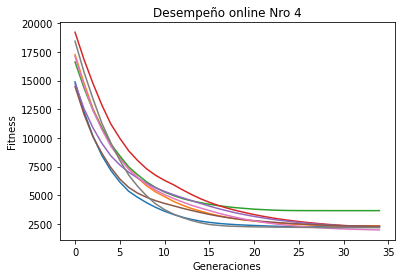

mejor fitness final:  4338.076673913372
mejor fitness final:  5631.8952778740995
mejor fitness final:  5562.742129973855
mejor fitness final:  4877.65093001876
mejor fitness final:  3255.968101832624
mejor fitness final:  6423.7051549235075
mejor fitness final:  3804.6786019961783
mejor fitness final:  3337.45802942222


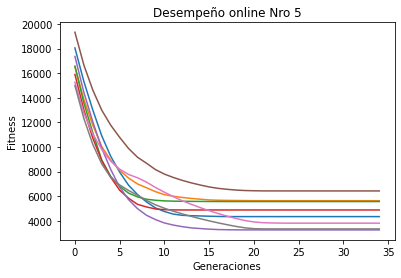

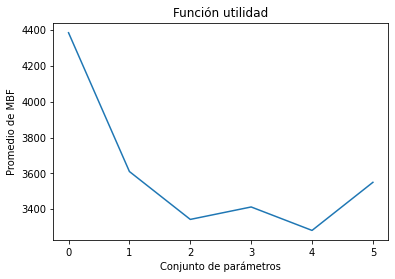

In [23]:
lutilidad, utilidad = [], []

lhiperparametros = []

vertices1 = pd.read_csv("../mapas/mapa3/nodes3.csv")
aristas1 = pd.read_csv("../mapas/mapa3/edges3.csv")

g = Graph()
for i in range(vertices1.shape[0]):
  g.agregar_vertice(vertices1["id"][i], vertices1["lon"][i], vertices1["lat"][i],i)

for j in range(aristas1.shape[0]):
  g.agregar_arista(aristas1["source"][j],aristas1["target"][j],aristas1["length"][j])

GENERACIONES = 40
q = 5 # parámetro que indica cada qué tantas generaciones se tiene que sacar el promedio del fitness (para online y offline)
s = 4261133139
t = 4436916496

for k in range(6):
  hiperparametros = {}

  #Elige hiperparametros en el rango dado
  MUTATION_RATE = random.random()*(0.9 - 0.3) + 0.3 #Rango:[0.3 - 0.9]
  CROSSOVER_RATE = random.random()*(0.9 - 0.5) + 0.5  #Rango:[0.5  - 0.9]
  N = random.randint(50, 300)
  num_padres = int((random.random()*0.8 + 0.2)*N) #Rango de 20% a 80% de la poblacion inicial

  #Guarda hiperparametros
  hiperparametros["MUTATION_RATE"] = MUTATION_RATE
  hiperparametros["CROSSOVER_RATE"] = CROSSOVER_RATE
  hiperparametros["N"] = N
  hiperparametros["NUM_PADRES"] = num_padres
  lhiperparametros.append(hiperparametros)
  for i in range(8):
    online, offline, f = AG_caminoMinimo(N=N, GENERACIONES=GENERACIONES, CROSSOVER_RATE=CROSSOVER_RATE, MUTATION_RATE=MUTATION_RATE, num_padres=num_padres, q=q, s=s, t=t, g=g, seleccion="RULETA")
    lutilidad.append(sum(f) / len(f))
    plt.plot(online)
  plt.title("Desempeño online Nro {k}".format(k=k))
  plt.ylabel("Fitness")
  plt.xlabel("Generaciones")
  plt.show()
  utilidad.append(sum(lutilidad) / len(lutilidad))
#Funcion utilidad
plt.plot(utilidad)
plt.title("Función utilidad")
plt.ylabel("Promedio de MBF")
plt.xlabel("Conjunto de parámetros")
plt.show()

   #lbest.append(f) #mejores por generación

In [24]:
lhiperparametros

[{'MUTATION_RATE': 0.37221703037229265,
  'CROSSOVER_RATE': 0.5200473337235232,
  'N': 94,
  'NUM_PADRES': 52},
 {'MUTATION_RATE': 0.7484008297635834,
  'CROSSOVER_RATE': 0.7347009608540287,
  'N': 220,
  'NUM_PADRES': 217},
 {'MUTATION_RATE': 0.6260741413094284,
  'CROSSOVER_RATE': 0.7070893200353073,
  'N': 260,
  'NUM_PADRES': 252},
 {'MUTATION_RATE': 0.5586328641851627,
  'CROSSOVER_RATE': 0.8485360659839871,
  'N': 141,
  'NUM_PADRES': 104},
 {'MUTATION_RATE': 0.5688893830492766,
  'CROSSOVER_RATE': 0.5615332394922707,
  'N': 144,
  'NUM_PADRES': 114},
 {'MUTATION_RATE': 0.32892753300903754,
  'CROSSOVER_RATE': 0.5656272704316657,
  'N': 61,
  'NUM_PADRES': 31}]